In [7]:
import pandas as pd

# Creating one dataframe with both csv data files
df = pd.concat(
    map(pd.read_csv, ['data/final_tmdb_data_2000.csv.gz', 'data/final_tmdb_data_2001.csv.gz']), ignore_index=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2102.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.000,0.0,NaN
2513,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN
2514,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN
2515,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR


### 1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [9]:
# finding the value counts of the rows that have a budget or revenue > 0
finance = (df['budget'] > 0) | (df['revenue'] > 0)
finance.value_counts()

False    1889
True      628
dtype: int64

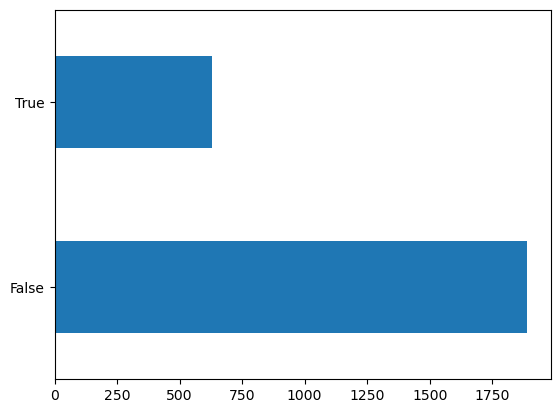

In [22]:
# Graphing how many rows have data for revenue or budget vs those that do not.
finance.value_counts().plot(kind='barh');

### 2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [16]:
# Finding the counts for each certification
categories = df['certification'].value_counts()
categories

R          456
PG-13      183
NR          68
PG          63
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

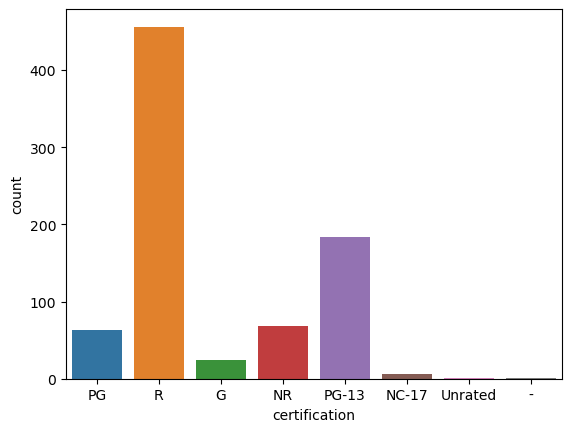

In [23]:
import seaborn as sns
sns.countplot(data = categories, x = df['certification']);

### 3. What is the average revenue per certification category?

In [25]:
# Calculating the avg revenue of each certification category
rev_categories = df.groupby('certification')['revenue'].mean()
rev_categories

certification
-          0.000000e+00
G          7.218533e+07
NC-17      0.000000e+00
NR         2.221903e+06
PG         6.258310e+07
PG-13      7.105711e+07
R          1.667849e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

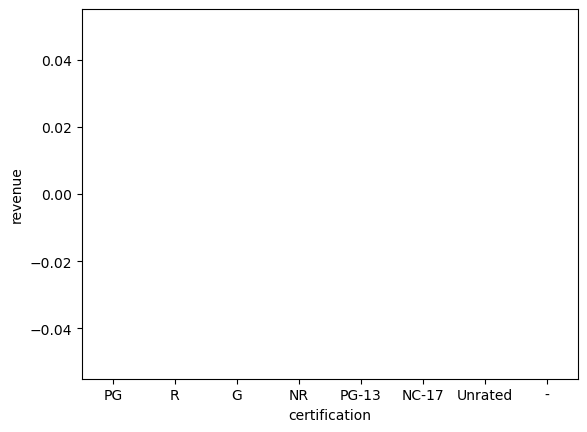

In [34]:
sns.barplot(data= df, x = df['certification'], y = rev_categories);

### 4. What is the average budget per certification category?

In [35]:
# Calculating the avg budget of each certification category
budg_categories = df.groupby('certification')['budget'].mean()
budg_categories

certification
-          0.000000e+00
G          2.383333e+07
NC-17      0.000000e+00
NR         1.575590e+06
PG         2.498016e+07
PG-13      3.089157e+07
R          9.916676e+06
Unrated    0.000000e+00
Name: budget, dtype: float64

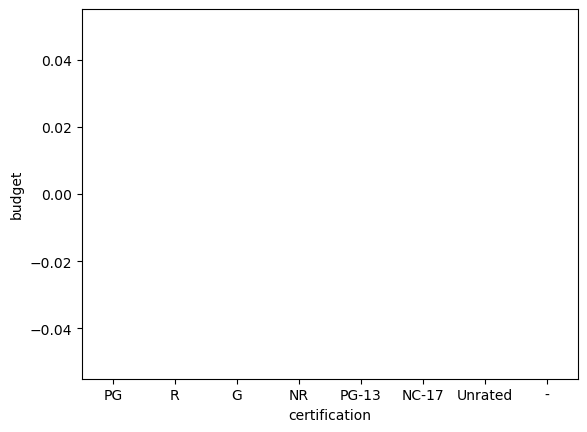

In [38]:
sns.barplot(data = df, x = df['certification'], y = budg_categories);

In [39]:
# write a pandas dataframe to gzipped CSV file
df.to_csv("data/tmdb_results_combined.csv.gz", 
           index=False, 
           compression="gzip")